In [1]:
%matplotlib inline 
from matplotlib import pyplot as plt
from PIL import Image, ImageDraw
import numpy as np
import copy
from scipy.spatial.distance import cosine

from IPython.display import display, clear_output

In [2]:
image_main = Image.open("vlad.jpg")

image = Image.open("vlad.jpg")
image = image.convert("RGBA")
# image.putalpha(255)
image = np.array(image)

source = Image.new('RGBA', (image.shape[0], image.shape[1]), 'white')
source = np.array(source)

# source = Image.open("source.jpg")
# source.convert("RGBA")
# source.putalpha(256)
# source = np.array(source)

print(source.shape)
print(image.shape)

source_vector = source.reshape((source.shape[0] * source.shape[1] * source.shape[2]))
fitness_vector = image.reshape((image.shape[0] * image.shape[1] * image.shape[2]))
print(fitness_vector.shape)
print(source_vector.shape)

population_size = 80

(511, 511, 4)
(511, 511, 4)
(1044484,)
(1044484,)


In [3]:
def fitness(gene):
    return np.abs(cosine(gene, fitness_vector))

In [4]:
def selection(population):
    fitness_array = np.array(sorted(population, key=(lambda x: fitness(x))))[:2]
    n = 0
    new_population = []
    while(n < population_size):
        idx = np.random.randint(low=0, high=population_size)
        idx2 = np.random.randint(1)
        mutant = mutate(crossover(fitness_array[idx2], population[idx]))
#         if(fitness(mutant) <= (fitness(population[idx]) + fitness(fitness_array[idx2]))/2):
        new_population.append(mutant)
        n += 1
#         if(np.random.rand() < ((idx+1)/(population_size+4))):
#             mutant = mutate(crossover(fitness_array[idx], fitness_array[n]))
# #             if(fitness(mutant) >= (fitness(fitness_array[idx]) + fitness(fitness_array[n]))/2):
#             new_population.append(mutant)
# #             print(n)
#             n += 1
    return np.array(sorted(new_population, key=(lambda x: fitness(x))))
    
        

In [5]:
def generation(gene, num):
    return [gene for x in range(num)]

In [6]:
def crossover(gene1, gene2):
    idx = np.random.randint(low=0, high=len(gene1))
    
    reshaped_gene1 = gene1.reshape((source.shape[0] * source.shape[1], source.shape[2]))
    reshaped_gene2 = gene2.reshape((source.shape[0] * source.shape[1], source.shape[2]))
    
    child = np.append(reshaped_gene1[:idx], reshaped_gene2[idx:])
    
    child = child.reshape((source.shape[0] * source.shape[1] * source.shape[2]))

    

#     img1 = Image.fromarray(gene1.reshape((source.shape[0], source.shape[1], source.shape[2])))
#     img2 = Image.fromarray(gene2.reshape((source.shape[0], source.shape[1], source.shape[2])))
    
    
#     opa = 0.5
#     if(fitness(gene1) > fitness(gene2)):
#         opa = np.random.uniform(0.1, 0.5)
#     else:
#         opa = np.random.uniform(0.5, 0.9)
    
#     child = Image.blend(img1, img2, opa)
    
#     child = np.array(child).reshape((source.shape[0] * source.shape[1] * source.shape[2]))
    
    return child

In [7]:
def mutate(gene):
    img = Image.fromarray(gene.reshape((source.shape[0], source.shape[1], source.shape[2])))
    draw = ImageDraw.Draw(img)
    
    for i in range(100):
        start_point = (np.random.randint(source.shape[0]), np.random.randint(source.shape[1]))
        pxl = image_main.getpixel(start_point)
        color = [pxl[0], pxl[1], pxl[2], 255]
        
#         if(np.random.rand() < 0.02):
#             color[0] = np.random.randint(256)
#         if(np.random.rand() < 0.02):
#             color[1] = np.random.randint(256)
#         if(np.random.rand() < 0.02):
#             color[2] = np.random.randint(256)
        
        color = tuple(color)
        
        draw.line(xy=[(start_point), (start_point[0] + np.random.randint(-15,15), start_point[1] + np.random.randint(-15,15))], fill=color, width=2)
        draw.line(xy=[(start_point[0], start_point[1] + np.random.randint(-15,15)), (start_point[0] + np.random.randint(-15,15), start_point[1])], fill=color, width=2)
        draw.ellipse(xy=[(start_point[0]-2, start_point[1]-2), (start_point[0]+4, start_point[1]+4)], fill=color, outline=color)
#         draw.ellipse(xy=((np.random.randint(start_point[0]-10,start_point[0]+10),np.random.randint(start_point[1]-10,start_point[1] + 10)), (np.random.randint(start_point[0]-10,start_point[0]+10),np.random.randint(start_point[1]-10,start_point[1] + 10))), fill=color, outline=color)  
#         draw.polygon(xy=[(np.random.randint(start_point[0]-20, start_point[0]+20), np.random.randint(start_point[1]-20, start_point[1]+20)) for x in range(np.random.randint(3, 9))], outline=color, fill=color)
        
    new_gene = np.array(img).reshape((source.shape[0] * source.shape[1] * source.shape[2]))
    del draw
    return new_gene

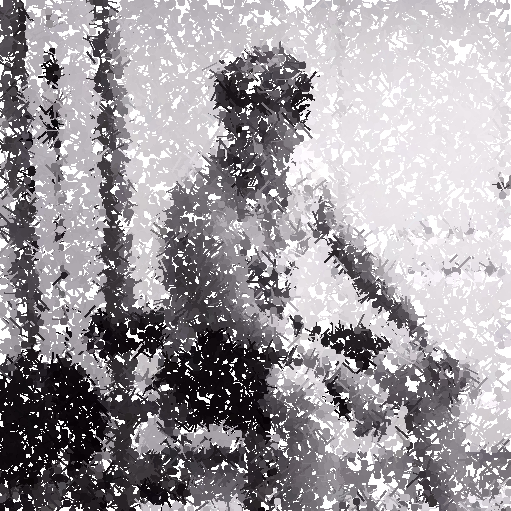

Epoch  60
Fitness  0.1493553091950317


In [ ]:
pop = generation(source_vector, population_size)
for i in range(2000):
#     pop = generation(source_vector, population_size)
    pop = selection(pop)
    if( i % 10 == 0):
        to_disp = Image.fromarray(pop[0].reshape((source.shape[0], source.shape[1], source.shape[2])))
        clear_output(wait=True)
        display(to_disp)
        print('Epoch ', i)
        print('Fitness ', fitness(pop[0]))
#     if( i % 10 == 0):
#         clear_output(wait=True)
#         display(to_disp)

to_save = Image.fromarray(pop[0].reshape((source.shape[0], source.shape[1], source.shape[2])))
to_save = to_save.convert("RGB")
to_save.save("vladie.jpg")
        
        

In [134]:
to_save = Image.fromarray(pop[0].reshape((source.shape[0], source.shape[1], source.shape[2])))
to_save = to_save.convert("RGB")
to_save.save("vladie.jpg")